<a href="https://colab.research.google.com/github/manthinks/Be-7th-sem-project/blob/main/ML_Course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import pandas_profiling as pp


In [ ]:
train=pd.read_csv("train.csv")

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
stores=pd.read_csv("stores.csv")

In [ ]:
stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
features=pd.read_csv("features.csv")

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
train=train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
train.head(10)

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
5,1,2010-03-12,1439541.59
6,1,2010-03-19,1472515.79
7,1,2010-03-26,1404429.92
8,1,2010-04-02,1594968.28
9,1,2010-04-09,1545418.53


In [ ]:
data=pd.merge(train,features,on=["Store","Date"],how="inner")


In [ ]:
data.tail()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
6430,45,2012-09-28,713173.95,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
6431,45,2012-10-05,733455.07,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
6432,45,2012-10-12,734464.36,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
6433,45,2012-10-19,718125.53,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False
6434,45,2012-10-26,760281.43,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False


In [ ]:
data=pd.merge(data,stores,on=['Store'],how='inner')


In [ ]:
data.sample()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
418,3,2012-08-17,394918.83,87.36,3.571,990.08,44.2,NaN,401.46,430.69,225.555866,6.334,False,B,37392


In [ ]:
data=data.sort_values(by="Date")

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1287,10,2010-02-05,2193048.75,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,False,B,126512
5148,37,2010-02-05,536006.73,45.97,2.572,NaN,NaN,NaN,NaN,NaN,209.852966,8.554,False,C,39910
2288,17,2010-02-05,789036.02,23.11,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,6.548,False,B,93188
4147,30,2010-02-05,465108.52,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,C,42988


In [ ]:
data=data.reset_index()

In [ ]:
data.head(10)

,index,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1287,10,2010-02-05,2193048.75,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,False,B,126512
2,5148,37,2010-02-05,536006.73,45.97,2.572,NaN,NaN,NaN,NaN,NaN,209.852966,8.554,False,C,39910
3,2288,17,2010-02-05,789036.02,23.11,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,6.548,False,B,93188
4,4147,30,2010-02-05,465108.52,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,C,42988
5,3432,25,2010-02-05,677231.63,21.10,2.784,NaN,NaN,NaN,NaN,NaN,204.247194,8.187,False,B,128107
6,3003,22,2010-02-05,1033017.37,24.36,2.788,NaN,NaN,NaN,NaN,NaN,135.352461,8.283,False,B,119557
7,3146,23,2010-02-05,1364721.58,15.25,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,5.892,False,B,114533
8,3289,24,2010-02-05,1388725.63,22.43,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.326,False,A,203819
9,2574,19,2010-02-05,1507637.17,20.96,2.954,NaN,NaN,NaN,NaN,NaN,131.527903,8.350,False,A,203819


In [ ]:
profile=pp.ProfileReport(data)
profile.to_file("Eda_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Type', ylabel='count'>

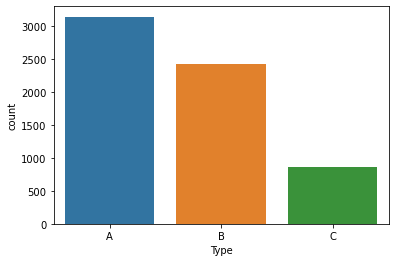

In [ ]:
sns.countplot(x="Type", data=data)

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

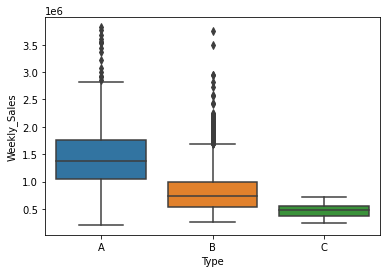

In [ ]:
sns.boxplot(x='Type',y='Weekly_Sales',data=data)


In [ ]:
data[["Weekly_Sales"]].loc[data["Type"]=="A"].describe()


,Weekly_Sales
count,3.146000e+03
mean,1.376673e+06
std,5.308793e+05
min,2.099863e+05
25%,1.050000e+06
50%,1.370656e+06
75%,1.759442e+06
max,3.818686e+06


In [ ]:
IQR=1.759442e+06-1.050000e+06
print(IQR)



709442.0


In [ ]:
d1=data[["Weekly_Sales","Type"]].sort_values(by="Weekly_Sales").reset_index()
dfa=d1[["Weekly_Sales"]].loc[data["Type"]=="A"]
dfq1=np.quantile(dfa,[0,0.25,0.5,0.75,1])



In [ ]:
print(dfq1)

[ 209986.25    552109.1325  960447.32   1422187.425  3749057.69  ]


In [ ]:
IQR_A=1422187.25-552109.1325
print("IQR:",IQR_A)

LR_A=552109-(1.5*IQR_A)
print(LR_A)
UR_A=1422187.425+(1.5*IQR_A)
print(UR_A)

IQR: 870078.1175
-753008.17625
2727304.6012500003


In [ ]:
d2=data[["Weekly_Sales","Type"]].sort_values(by="Weekly_Sales").reset_index()
dfb=d2[["Weekly_Sales"]].loc[data["Type"]=="B"]
dfq2=np.quantile(dfb,[0,0.25,0.5,0.75,1])



In [ ]:
print(dfq2)

[ 213538.32   553322.83   961685.98  1420609.555 3818686.45 ]


In [ ]:
IQR_B=1420609.25-553322.83
print("IQR:",IQR_B)

LR_B=553322.83-(1.5*IQR_B)
print(LR_A)
UR_B=1420609.25+(1.5*IQR_B)
print(UR_B)

IQR: 867286.42
-753008.17625
2721538.88


In [ ]:
UR_F=(UR_A+UR_B)/2
print(UR_F)

2724421.740625


In [ ]:
data.shape

(6435, 16)

In [ ]:
data=(data[data["Weekly_Sales"]<UR_F])

In [ ]:
data.shape

(6401, 16)

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

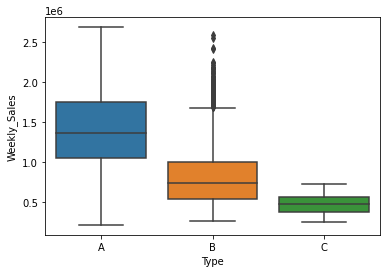

In [ ]:
sns.boxplot(x='Type',y='Weekly_Sales',data=data)

In [ ]:
dfa

,Weekly_Sales
0,209986.25
8,224806.96
9,226702.36
11,230519.49
12,231155.90
...,...
6419,2939946.38
6427,3526713.39
6428,3555371.03
6429,3556766.03


<AxesSubplot:ylabel='Frequency'>

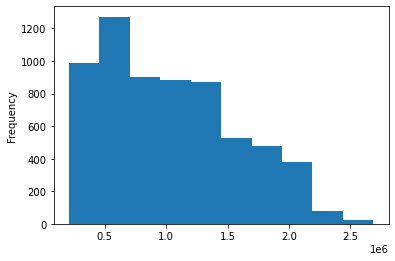

In [ ]:
data["Weekly_Sales"].plot.hist()

<AxesSubplot:xlabel='IsHoliday', ylabel='count'>

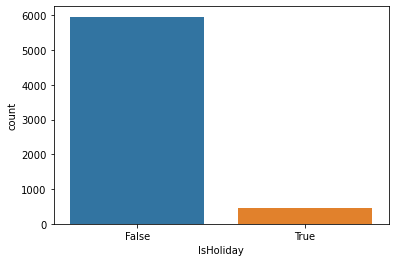

In [ ]:
sns.countplot(x="IsHoliday", data=data)

In [ ]:
data.isnull().sum()

df_index        0
Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

In [ ]:
data.shape

(6401, 11)

In [ ]:
4155/6435*100

64.56876456876456

In [ ]:
4798/6435*100

74.56099456099456

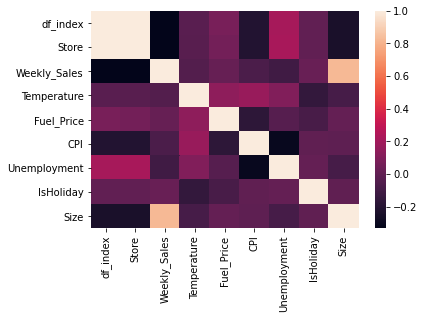

In [ ]:
#correl=data["Weekly_Sales","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"].corr()
data.corr()
dp=sns.heatmap(data.corr())

In [ ]:
data=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
data.head(10)

KeyError: "['MarkDown1' 'MarkDown2' 'MarkDown3' 'MarkDown4' 'MarkDown5'] not found in axis"

In [ ]:
data.isnull().sum()

df_index        0
Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

In [ ]:
data.head(10)

,df_index,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1,1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512
2,5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910
3,2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188
4,4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988
5,3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107
6,3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557
7,3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533
8,3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819
9,2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819


In [ ]:
data.isnull().sum()

df_index        0
Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

In [ ]:
data['Holiday']=[int(i) for i in list(data.IsHoliday)]
data.head(10)

,df_index,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday
0,0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0
1,1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0
2,5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0
3,2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0
4,4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0
5,3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107,0
6,3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557,0
7,3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533,0
8,3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819,0
9,2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819,0


In [ ]:
data["Holiday"].value_counts()

0    5960
1     441
Name: Holiday, dtype: int64

In [ ]:
Type_dummy=pd.get_dummies(data['Type'],drop_first=True)
Type_dummy.head(10)

,B,C
0,0,0
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,1,0
7,1,0
8,0,0
9,0,0


In [ ]:
data.head()

,df_index,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday
0,0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0
1,1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0
2,5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0
3,2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0
4,4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0


In [ ]:
dum=pd.get_dummies(data['Type'],drop_first=True)
dum.head(10)

,B,C
0,0,0
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,1,0
7,1,0
8,0,0
9,0,0


In [ ]:
data=pd.concat([data,Type_dummy],axis=1)
data.head(10)

,df_index,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday,B,C
0,0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315,0,0,0
1,1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512,0,1,0
2,5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,False,C,39910,0,0,1
3,2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,False,B,93188,0,1,0
4,4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,False,C,42988,0,0,1
5,3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,False,B,128107,0,1,0
6,3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557,0,1,0
7,3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533,0,1,0
8,3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819,0,0,0
9,2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819,0,0,0


In [ ]:
data=data.drop(['Type','IsHoliday'],axis=1)
data.drop(10)

,df_index,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C
0,0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315,0,0,0
1,1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,126512,0,1,0
2,5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,39910,0,0,1
3,2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,93188,0,1,0
4,4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,42988,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,3574,25,2012-10-26,688940.94,56.69,3.882,216.151590,7.293,128107,0,1,0
6431,714,5,2012-10-26,319550.77,71.70,3.506,224.037814,5.422,34875,0,1,0
6432,5719,40,2012-10-26,921264.52,49.65,3.917,138.728161,4.145,155083,0,0,0
6433,2573,18,2012-10-26,1127516.25,56.09,3.917,138.728161,8.243,120653,0,1,0


In [ ]:
data["Year"]=data["Date"].str.split("-").str[0]
data["Month"]=data["Date"].str.split("-").str[1]
data["Dates"]=data["Date"].str.split("-").str[2]

In [ ]:
data.head(10)

,df_index,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C,Year,Month,Dates
0,0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315,0,0,0,2010,02,05
1,1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,126512,0,1,0,2010,02,05
2,5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,39910,0,0,1,2010,02,05
3,2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,93188,0,1,0,2010,02,05
4,4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,42988,0,0,1,2010,02,05
5,3432,25,2010-02-05,677231.63,21.10,2.784,204.247194,8.187,128107,0,1,0,2010,02,05
6,3003,22,2010-02-05,1033017.37,24.36,2.788,135.352461,8.283,119557,0,1,0,2010,02,05
7,3146,23,2010-02-05,1364721.58,15.25,2.788,131.527903,5.892,114533,0,1,0,2010,02,05
8,3289,24,2010-02-05,1388725.63,22.43,2.954,131.527903,8.326,203819,0,0,0,2010,02,05
9,2574,19,2010-02-05,1507637.17,20.96,2.954,131.527903,8.350,203819,0,0,0,2010,02,05


In [ ]:
data.dtypes

df_index          int64
Store             int64
Date             object
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Size              int64
Holiday           int64
B                 uint8
C                 uint8
Year             object
Month            object
Dates            object
dtype: object

In [ ]:
data["Dates"]=data["Dates"].astype("int")
data["Month"]=data["Month"].astype("int")
data["Year"]=data["Year"].astype("int")

In [ ]:
data.dtypes

df_index          int64
Store             int64
Date             object
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Size              int64
Holiday           int64
B                 uint8
C                 uint8
Year              int32
Month             int32
Dates             int32
dtype: object

In [ ]:
data.head()

,df_index,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C,Year,Month,Dates
0,0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,151315,0,0,0,2010,2,5
1,1287,10,2010-02-05,2193048.75,54.34,2.962,126.442065,9.765,126512,0,1,0,2010,2,5
2,5148,37,2010-02-05,536006.73,45.97,2.572,209.852966,8.554,39910,0,0,1,2010,2,5
3,2288,17,2010-02-05,789036.02,23.11,2.666,126.442065,6.548,93188,0,1,0,2010,2,5
4,4147,30,2010-02-05,465108.52,39.05,2.572,210.752605,8.324,42988,0,0,1,2010,2,5


In [ ]:
data=data.drop("Date",axis=1)

In [ ]:
data

,df_index,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C,Year,Month,Dates
0,0,1,1643690.90,42.31,2.572,211.096358,8.106,151315,0,0,0,2010,2,5
1,1287,10,2193048.75,54.34,2.962,126.442065,9.765,126512,0,1,0,2010,2,5
2,5148,37,536006.73,45.97,2.572,209.852966,8.554,39910,0,0,1,2010,2,5
3,2288,17,789036.02,23.11,2.666,126.442065,6.548,93188,0,1,0,2010,2,5
4,4147,30,465108.52,39.05,2.572,210.752605,8.324,42988,0,0,1,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,3574,25,688940.94,56.69,3.882,216.151590,7.293,128107,0,1,0,2012,10,26
6431,714,5,319550.77,71.70,3.506,224.037814,5.422,34875,0,1,0,2012,10,26
6432,5719,40,921264.52,49.65,3.917,138.728161,4.145,155083,0,0,0,2012,10,26
6433,2573,18,1127516.25,56.09,3.917,138.728161,8.243,120653,0,1,0,2012,10,26


In [ ]:
X=data.drop(["df_index","Weekly_Sales"],axis=1)
y=data['Weekly_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
LR=LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(normalize=True)

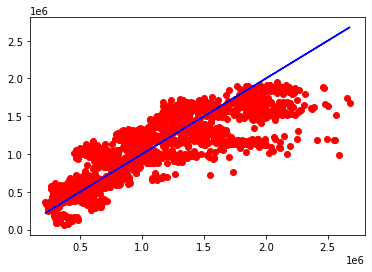

In [ ]:

y_pred=LR.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

In [ ]:
Root_mean_square_error=np.sqrt(np.mean(np.square(y_test-y_pred)))
print(Root_mean_square_error)

294271.43614842364


In [ ]:
X_train

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Holiday,B,C,Year,Month,Dates
803,41,60.13,2.700,189.422658,7.363,196321,0,0,0,2010,6,4
3845,18,60.44,3.758,136.367000,8.890,120653,0,1,0,2011,9,23
4607,25,23.87,3.533,212.833640,6.961,128107,0,1,0,2012,1,20
6298,35,64.50,3.985,142.851683,8.665,103681,0,1,0,2012,10,5
4213,5,64.33,3.308,218.793912,6.300,34875,0,1,0,2011,11,18
...,...,...,...,...,...,...,...,...,...,...,...,...
1025,5,81.14,2.642,211.664291,6.496,34875,0,1,0,2010,7,9
174,1,46.63,2.561,211.319643,8.106,151315,0,0,0,2010,2,26
2175,36,54.11,2.942,210.184236,8.395,39910,0,0,0,2011,1,7
3550,41,72.19,3.554,193.911013,6.901,196321,0,0,0,2011,8,5


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.7233213357849033


In [ ]:
prediction=LR.predict(pd.DataFrame([(6,43.37,3.876,173.325456,7.934,103464,0,0,0,2026,10,10)]))
print(prediction)

[824173.66542031]
